# Intro

W tym notebooku pokażemy jak w pythonie dokonać klasteryzacji danych numerycznych. Wykorzystamy nieśmiertelny zbiór danych Iris, który opisuje kwiaty z gatunku irysów.
Jest to prawdopobnie najpopularniejszy zbiór danych zawarty w literatuze do wykrywania wzorców w danych. Artykuł Fisher'a jest klasykiem w tej dziedzinie, i jest często cytowany po dziś dzień. Zbiór danych posiada 150 obserwacji (3 klasy kwiatów po 50 obserwacji).



Zmienne:

1. długość kielicha (sepal) w cm
2. szerokość kielicha w cm
3. długość płatka (petal) w cm
4. szerokość płatka in cm
5. klasa:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Import bibliotek

In [26]:
import sklearn.cluster as clust
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [27]:
%matplotlib inline

# Wczytywanie danych

In [28]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['y'] = iris.target

Pokaż pierwsze 10 obserwacji, za pomocą odpowiedniej metody wyświetl statystyki opisowe

In [29]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [30]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Exploracja danych

Stwórzmy wykres punktowy - zależność długości od szerokości kielicha:

``plt.scatter(x,y)``

Text(0.5, 1.0, 'Zależność długości od szerokości kielicha')

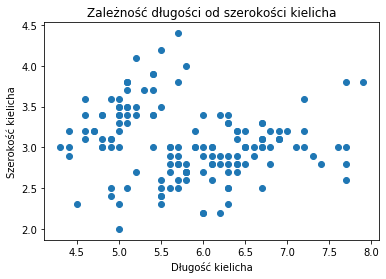

In [31]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])
plt.xlabel('Długość kielicha')
plt.ylabel('Szerokość kielicha')
plt.title('Zależność długości od szerokości kielicha')

Oraz wykres punktowy - zależność długości i szerokości płatka

Text(0.5, 1.0, 'Zależność długości od szerokości płatka')

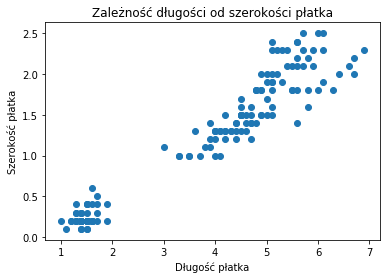

In [32]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Zależność długości od szerokości płatka')

Możemy zauważyć parę klastrów obserwacji. Wypróbujemy kilka wariantów przy pomocy odpowiednich metod

# Metoda k-średnich

Wybierz dwie kolumny do klastrowania (będziemy również wizualizować dane za pomocą scatterplota)

In [33]:
zmienne_do_klastrowania = ['petal length (cm)', 'petal width (cm)']

In [34]:
from sklearn.cluster import KMeans

Zdefiniujmy sobie funkcję pomocniczą do robienia wykresu dla zadanego grupowania

In [35]:
def print_clustering(data, labels):
    labels_and_styles = dict(zip(range(5), list("v*+xDop")))
    
    for i in range(data.shape[0]):
        lab = labels[i]
        marker = labels_and_styles.get(lab, '*')
        plt.scatter(data.iloc[i, 0], data.iloc[i, 1], marker=labels_and_styles[lab], c='b')
    
    plt.show()

Wypróbujmy algorytm k-średnich dla różnych wartości k

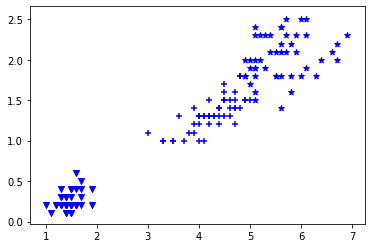

In [36]:
k_3 = KMeans(n_clusters=3)
k_3.fit(data[zmienne_do_klastrowania])
print_clustering(data[zmienne_do_klastrowania], k_3.labels_)

k=4

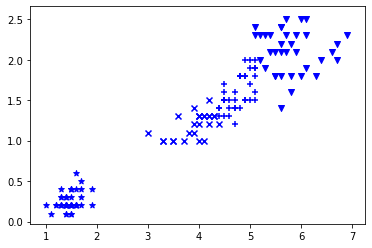

In [37]:
k_4 = KMeans(n_clusters=4)
k_4.fit(data[zmienne_do_klastrowania])
print_clustering(data[zmienne_do_klastrowania], k_4.labels_)

k=2

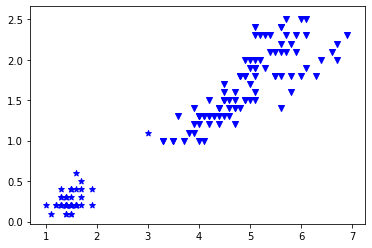

In [38]:
k_2 = KMeans(n_clusters=2)
k_2.fit(data[zmienne_do_klastrowania])
print_clustering(data[zmienne_do_klastrowania], k_2.labels_)

# Jakość grupowania

**Współczynnik SILHOUETTE**

Formally:

* a: Średni dystans między elementem klastra a wszystkimi innymi punktami w tym samym klastrze.
* b: średni dystans między elementem klastra, a wszystkimi innymi punktami w najbliższym klastrze.


$$ s = \frac{b - a }{max(a,b)} $$


Inną metryką poprawności jest **Współczynnik Calińskiego-Harabasza**, 

* N - liczba obserwacji
* k - liczba klastrów

$$W_k = \sum^k_{q=1} \sum_{x \in C_1} (x - c_q)^2$$


$$B_k = \sum^k_{q=1} n_q (c_q -c)^2 $$

$$calinski(k) = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N-K}{K-1}$$

Napisz pętlę, która przeiteruje przez możliwe k (od 2 do 9), następnie miary dopasowania dodaj do odpowiednich list

In [39]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_clusters = []
silhouette = []
calinski = []
suma_kwadratow = []

for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(data[zmienne_do_klastrowania])
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(data[zmienne_do_klastrowania], km.labels_))
    calinski.append(calinski_harabasz_score(data[zmienne_do_klastrowania], km.labels_))
    suma_kwadratow.append(km.inertia_)

Wykreśl wartość współczynnika silhouette w zależności od liczby klastrów

Text(0, 0.5, 'Współczynnik Silhouette')

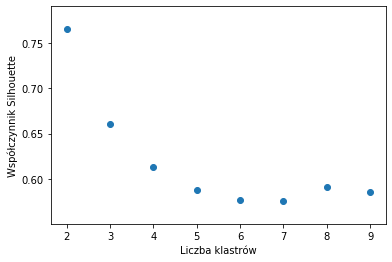

In [40]:
plt.scatter(k_clusters, silhouette)
plt.xlabel('Liczba klastrów')
plt.ylabel('Współczynnik Silhouette')

A także Calińskiego Harabasza:

Text(0, 0.5, 'Współczynnik C-H')

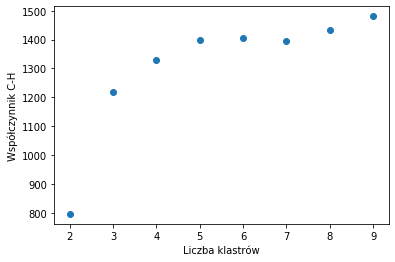

In [41]:
plt.scatter(k_clusters, calinski)
plt.xlabel('Liczba klastrów')
plt.ylabel('Współczynnik C-H')

Oraz wartości wewnątrzgrupowej sumy kwadratów:

Text(0, 0.5, 'Suma kwadratów')

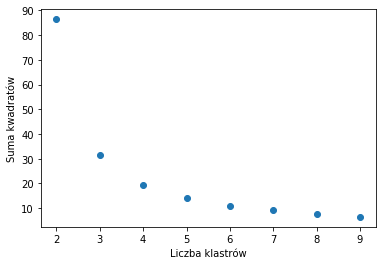

In [42]:
plt.scatter(k_clusters, suma_kwadratow)
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów')

# Inny przykład

Wczytujemy fikcyjne dane dotyczące klientów pewnego banku. Trzy zmienne dotyczą:
* wieku
* przeciętnych zarobków
* przeciętnie odkładanych środków na oszczędności (jako % zarobków)

Twoim zadaniem będzie dokonanie ich klasteryzacji

In [43]:
klienci_banku = pd.read_csv('banking_data.csv')

In [44]:
klienci_banku.head()

,oszczednosci,wiek,zarobki
0,0.134,50,7141.52
1,0.125,34,4841.35
2,0.048,34,2415.62
3,0.241,30,2610.52
4,0.081,45,2431.64


In [45]:
klienci_banku.describe()

,oszczednosci,wiek,zarobki
count,315.000000,315.000000,315.000000
mean,0.187254,31.533333,3805.114444
std,0.128894,8.532516,1478.558643
min,0.000000,18.000000,2016.190000
25%,0.062000,25.000000,2551.080000
50%,0.215000,31.000000,3477.910000
75%,0.287500,37.000000,4530.805000
max,0.486000,54.000000,7972.000000


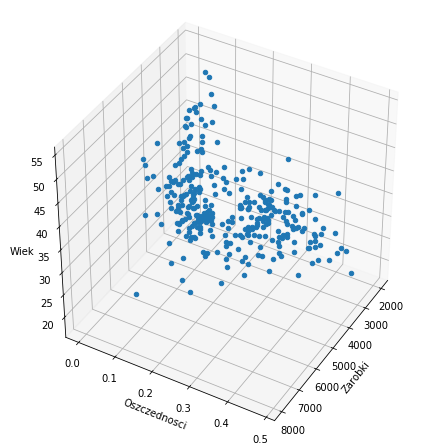

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], depthshade=False)
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(39, 30)
plt.show()

Ale najpierw, policz z odległość między pierwszym i drugim klientem ze zbioru (odległością euklidesową). Aby to zrobić, stwórz funkcję, która przyjmuje dwa wektory i zwraca jedną wartość będącą odległością euklidesową między tymi wektorami

In [47]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

euclidean_distance(klienci_banku.iloc[0], klienci_banku.iloc[1])

2300.2256474052715

In [48]:
print(klienci_banku.iloc[0])
print(klienci_banku.iloc[1])

oszczednosci       0.134
wiek              50.000
zarobki         7141.520
Name: 0, dtype: float64
oszczednosci       0.125
wiek              34.000
zarobki         4841.350
Name: 1, dtype: float64


Dokonaj standaryzacji danych (od każdej zmiennej odejmij średnią, i podziel przez jej odchylenie standardowe)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [50]:
klienci_banku

,oszczednosci,wiek,zarobki
0,0.134,50,7141.52
1,0.125,34,4841.35
2,0.048,34,2415.62
3,0.241,30,2610.52
4,0.081,45,2431.64
...,...,...,...
310,0.326,25,2389.32
311,0.390,22,2952.41
312,0.297,30,2921.88
313,0.435,49,6403.51


In [51]:
np.set_printoptions(suppress=True)
klienci_standaryzowani = pd.DataFrame(
    scaler.fit_transform(klienci_banku), columns=klienci_banku.columns
)

Wyświetl za pomocą metod ``.mean_``, ``.scale_`` informację o średniej i odchyleniu jakie były zastosowane w standaryzacji

In [52]:
scaler.mean_

array([   0.18725397,   31.53333333, 3805.11444444])

In [53]:
scaler.scale_

array([   0.12868924,    8.51896111, 1476.20985914])

Przedstaw ramkę

Podaj odległość euklidesową po standaryzacji

In [54]:
# odległość euklidesowa po standaryzacji:
euclidean_distance(klienci_standaryzowani.iloc[0], klienci_standaryzowani.iloc[1])

2.4413620201799358

Dokonaj klastrowania metodą k-średnich. Przyjmij liczbę skupień jako 3

In [55]:
km = KMeans(n_clusters=3)
km.fit(klienci_standaryzowani)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
scaler.inverse_transform(km.cluster_centers_)

array([[   0.05933571,   29.68571429, 3179.73735714],
       [   0.29755085,   28.55084746, 3373.68567797],
       [   0.27310526,   42.24561404, 6234.26157895]])

Do którego skupienia przyporządkowano poszczególne obserwacje?

In [57]:
km.labels_

array([2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,

Jakie są centra skupień? jak byś je scharakteryzował? 
Żeby dane powróciły do poprzedniej formy sprzed standaryzacji wykorzystaj metodę ``inverse_transform()`` obiektu scaler

In [58]:
scaler.inverse_transform(km.cluster_centers_)

array([[   0.05933571,   29.68571429, 3179.73735714],
       [   0.29755085,   28.55084746, 3373.68567797],
       [   0.27310526,   42.24561404, 6234.26157895]])

Przedstaw na wykresie 3D dane, a kolorem oznacz numer skupiska.
W ``ax.scatter`` dodaj parametr ``c=`` i przypisz do niego etykiety grupy do jakich zostały przypisane

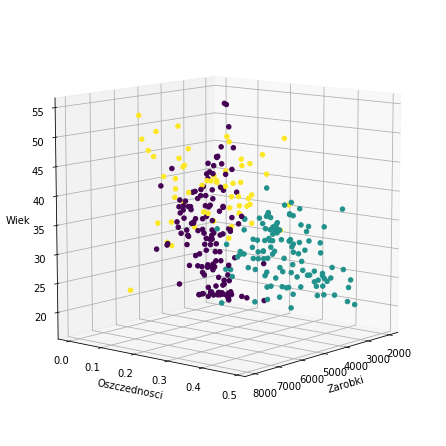

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c=km.labels_, depthshade=False)
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(10, 40)
plt.show()

Przedstaw miary jakości klastrowania dla tego modelu. Uwzględnij wewnątrzklastrową sumę ochyleń

Za pomocą pętli, przeanalizuj modele k-means dla k z zakresu (2,14), i porównaj miary jakości dopasowania. Ile klastrów byś wybrał?

In [60]:
k_clusters = []
silhouette = []
calinski = []
suma_kwadratow = []

for k in range(2, 15):
    km = KMeans(n_clusters=k)
    km.fit(klienci_standaryzowani)
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(klienci_standaryzowani, km.labels_))
    calinski.append(calinski_harabasz_score(klienci_standaryzowani, km.labels_))
    suma_kwadratow.append(km.inertia_)

Wyświetl wykresy różnych metryk poprawności w zależności od liczby wybranych klastrów:

In [61]:
silhouette

[0.3697884732373055,
 0.38231331451362655,
 0.4166006479081841,
 0.4086258388270986,
 0.4089557483725589,
 0.40384961892809096,
 0.38670756749515395,
 0.390410871508119,
 0.3854284435824689,
 0.38016426520778324,
 0.3880607196222096,
 0.3836129124200847,
 0.3757904656915498]

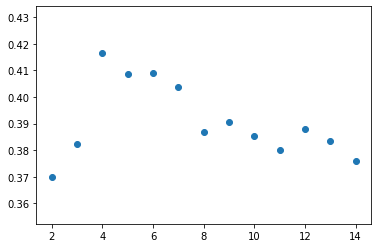

In [62]:
plt.scatter(k_clusters, silhouette)

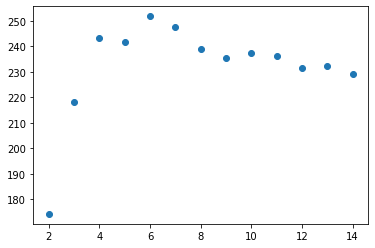

In [63]:
plt.scatter(k_clusters, calinski)

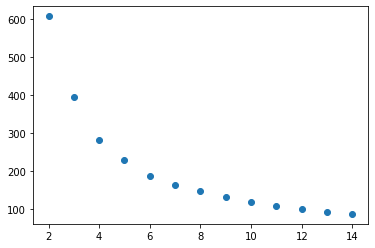

In [64]:
plt.scatter(k_clusters, suma_kwadratow)

Dokonaj grupowania za pomocą wybranego k, stwórzy wykres 3D z klastrami, wyświetl informacje o średnich i scharakteryzuj tak powstałe klastry klientów banku

In [65]:
km = KMeans(n_clusters=6)
km.fit(klienci_standaryzowani)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=klienci_banku.columns)

,oszczednosci,wiek,zarobki
0,0.310247,26.136986,3010.736301
1,0.283324,43.852941,7075.559412
2,0.045544,21.666667,2465.196491
3,0.040000,38.918919,2612.554865
4,0.110214,31.142857,4541.606786
5,0.283724,36.465517,4254.268448


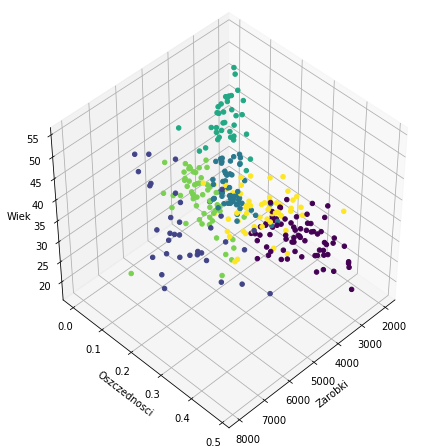

In [67]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c=km.labels_, depthshade=False)
ax.set_xlabel('Zarobki')
ax.set_ylabel('Oszczednosci')
ax.set_zlabel('Wiek')
ax.view_init(45, 45)
plt.show()

# Metoda aglomeracyjna

Przeanalizujemy dane o tych samych klientach banku

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# stwórzmy macierz połączeń
linkage_matrix = linkage(klienci_standaryzowani, 'ward')

In [77]:
linkage_matrix

array([[143.        , 186.        ,   0.01583355,   2.        ],
       [250.        , 258.        ,   0.0164815 ,   2.        ],
       [217.        , 220.        ,   0.01794004,   2.        ],
       ...,
       [614.        , 625.        ,   4.4485954 , 202.        ],
       [623.        , 624.        ,   4.8095022 , 113.        ],
       [626.        , 627.        ,   5.77602522, 315.        ]])

Tworzymy wykres dendrogramu:

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [111.875, 111.875, 162.5, 162.5],
  [66.25, 66.25, 137.1875, 137.1875],
  [35.0, 35.0, 101.71875, 101.71875],
  [12.5, 12.5, 68.359375, 68.359375],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [232.5, 232.5, 260.0, 260.0],
  [215.0, 215.0, 246.25, 246.25],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [230.625, 230.625, 291.25, 291.25],
  [200.0, 200.0, 260.9375, 260.9375],
  [185.0, 185.0, 230.46875, 230.46875],
  [40.429687

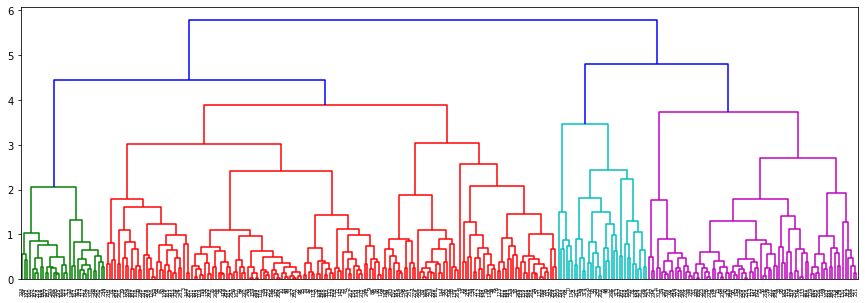

In [78]:
plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix)

Za pomocą odpowiednich współczynników sprawdź, które z rodzajów połączeń między klastrami daje najlepsze wyniki. Zajrzyj do dokumentacji funkcji linkage (np ``single, complete, average, weighted, centroid, median``)

Za pomocą funkcji ``fcluster`` możemy automatycznie przypisać każdemu obiektowi numer jego klastra określając zadaną przez nas liczbę klastrów ``criterion='maxclust'`` bądź odległości przy której podzielić klastry: ``criterion='distance'``

In [81]:
fcluster(linkage_matrix, t=3, criterion='maxclust')

array([1, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 1, 1,
       3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 2, 2, 3, 3,
       1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1,
       3, 3, 1, 3, 2, 2, 1, 1, 3, 2, 3, 2, 2, 2, 2, 1, 3, 3, 3, 2, 3, 3,
       3, 2, 2, 3, 3, 1, 3, 1, 1, 3, 3, 3, 2, 2, 3, 3, 1, 1, 2, 2, 3, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 1, 1, 2, 2, 1, 3, 1, 3,
       3, 2, 3, 3, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3,
       3, 1, 3, 2, 1, 3, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 2, 2, 3, 3, 1, 1,
       1, 2, 2, 1, 1, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 1, 1, 3, 2,
       2, 2, 2, 3, 2, 1, 3, 3, 1, 2, 2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 1,
       3, 2, 2, 2, 2, 2, 3, 1, 3, 2, 1, 3, 3, 1, 3, 1, 2, 3, 3, 3, 1, 3,
       3, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 1, 2, 3, 1, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3,
       2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2,

Za pomocą współczynnika silhouette porównaj jakość klastrowania hierarchicznego dla danych podzielonych na trzy klastry za pomocą:
- metody warda
- metody pojedynczego łączenia
- metody średniej

In [82]:
# from sklearn.metrics import silhouette_score

 

# for metryka in ['ward', 'single', 'average']:
#     linkage_matrix = linkage(klienci_standaryzowani, metryka)
#     predykcje = fcluster(linkage_matrix, t=3, criterion='maxclust')
#     score = silhouette_score(klienci_standaryzowani, predykcje)
#     print('Metoda: {} osiaga wynik {}'.format(metryka, score))

In [88]:
from sklearn.metrics import silhouette_score
k_clusters = []
linkage_ward = linkage(klienci_standaryzowani, 'ward')
linkage_single = linkage(klienci_standaryzowani, 'single')
linkage_mean = linkage(klienci_standaryzowani, 'average')

for metryka in ['ward', 'single', 'average']:
    linkage_matrix = linkage(klienci_standaryzowani, metryka)
    predykcje = fcluster(linkage_matrix, t=3, criterion='maxclust')
    score = silhouette_score(klienci_standaryzowani, predykcje)
    print('Metoda {} osiąga wynik {}'.format(metryka, score))

Metoda ward osiąga wynik 0.37012544812048165
Metoda single osiąga wynik 0.32883824212527024
Metoda average osiąga wynik 0.3224250191573211


## Grupowanie k-modes

Wczytaj dane dotyczące klientów banku z pliku csv ``bankmarketing.csv`` bądź ze strony: https://www.kaggle.com/ashydv/bank-marketing

In [90]:
data = pd.read_csv('bankmarketing.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Wyświetl typy danych, i za pomocą metody .value_counts() podaj statystyki dla zmiennych 'job', 'marital', 'education', 'housing'

In [99]:
# data.describe()
# data.info()
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [101]:
data['job'].value_counts(normalize=True)
# data['job'].value_counts()

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

In [94]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [95]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [102]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

Za pomocą funkcji pd.bin przekonwertuj wiek do zmiennej kategorialnej. Kategorie - [0-20], [20-30], [30-40] itd... (zobacz wcześniej jaka jest wartość maksymalna i minimalna

In [106]:
data['age_categorized'] = pd.cut(data['age'], [0, 20, 30, 40, 50, 60, 70, 100] )
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_categorized
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(30, 40]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(30, 40]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,"(50, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,"(70, 100]"
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,"(40, 50]"
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,"(50, 60]"
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,"(40, 50]"


Stwórz nową ramkę tylko z pięcioma zmiennymi kategorialnymi i opisz ją za pomocą metody .describe()

In [111]:
data_cat = data[['age_categorized', 'job', 'marital', 'housing', 'education']]
data_cat

,age_categorized,job,marital,housing,education
0,"(50, 60]",housemaid,married,no,basic.4y
1,"(50, 60]",services,married,no,high.school
2,"(30, 40]",services,married,yes,high.school
3,"(30, 40]",admin.,married,no,basic.6y
4,"(50, 60]",services,married,no,high.school
...,...,...,...,...,...
41183,"(70, 100]",retired,married,yes,professional.course
41184,"(40, 50]",blue-collar,married,no,professional.course
41185,"(50, 60]",retired,married,yes,university.degree
41186,"(40, 50]",technician,married,no,professional.course


Zakoduj wszystkie z pięciu zmiennych za pomocą modułu preprocessing

In [113]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
new_data = data_cat.apply(le.fit_transform)

In [115]:
new_data

,age_categorized,job,marital,housing,education
0,4,3,1,0,0
1,4,7,1,0,3
2,2,7,1,2,3
3,2,0,1,0,1
4,4,7,1,0,3
...,...,...,...,...,...
41183,6,5,1,2,5
41184,3,1,1,0,5
41185,4,5,1,2,6
41186,3,9,1,0,5


Zainstaluj, zaimportuj i wykorzystaj bibliotekę k-modes, a także uzyj jej do klastrowania cech klientów

In [117]:
!pip install kmodes

In [118]:
from kmodes.kmodes import KModes

In [120]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
fitClusters_cao = km.fit_predict(new_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9839, cost: 103517.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9806, cost: 100201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9131, cost: 101931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7391, cost: 102364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 105890.0
Best run was number 2


In [ ]:
km.cluster_centroids_

Przeprowadź analizę wartości funkcji kosztu w zależności od liczby k

In [126]:
koszt = []

for k in range(2, 14):
    km = KModes(n_clusters=k, n_init=3, init='Huang')
    km.fit(new_data)
    koszt.append(km.cost_)

KeyboardInterrupt: 

I przedstaw na wykresie:

In [ ]:
plt.plot(list(range(2,14)), koszt)

Informację o numerze klastra połącz z oryginalną ramką danych, a następnie wyświetl informacje o elementach z klastra

Dla każdego klastra przedstaw statystyki częstości według danej ramki. Będzie to kwestia zrobienia pętli po zmiennych i wyprintowania: ``value_counts(normalize=True)``dla każdej kolumny.

## DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

Dokonaj klasteryzacji metodą DBSCAN

In [9]:
clus = DBSCAN(eps=1, min_samples=2).fit_predict(klienci_banku)

NameError: name 'klienci_banku' is not defined

Wyświetl klastry do których należy każda z obserwacji

In [233]:
clus

array([ 0,  1,  1,  1,  1,  0,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

A także przedstaw na wykresie 3D

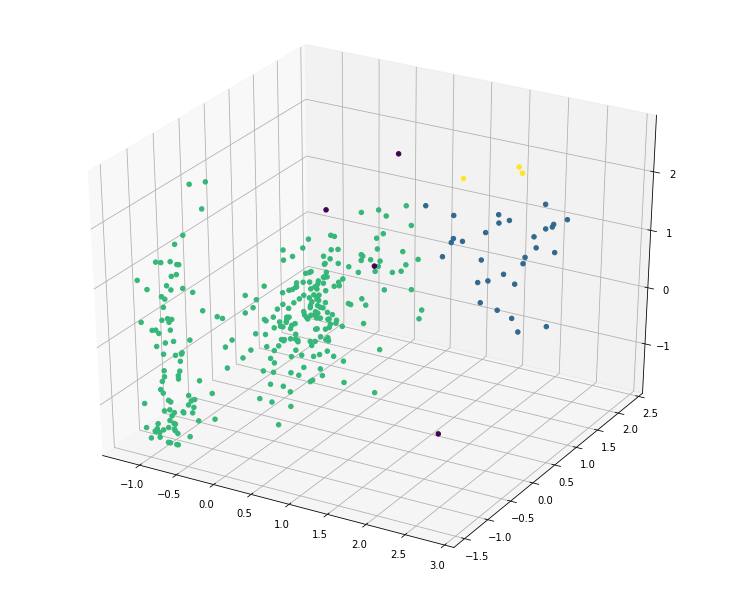

In [234]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'], c=clus,depthshade=False)
plt.show()

## Porównanie metod clusteringu na danych o różnej strukturze

In [12]:
from sklearn import datasets

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5],random_state=random_state)

Powyżej wygenerowano kilka zbiorów danych 2D o różnej strukturze. Twoim zadaniem jest dokonanie klasteryzacji wszystkimi poznanymi metodami (k-means, hierarchiczne, dbscan), oraz przedstawienie wizualnie efektów klastrowania dla każdego ze zbiorów danych. Przykładowe klastrowanie k-means dla zbioru noisy_circles:

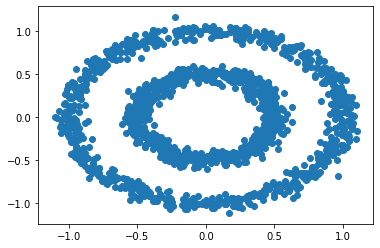

In [32]:
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1])

In [36]:
km_noisy = KMeans(n_clusters=2)
labels = km_noisy.fit_predict(noisy_circles[0])

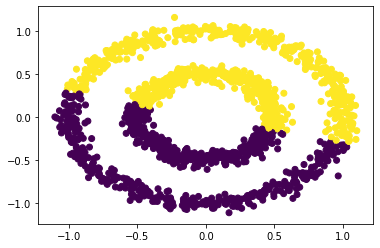

In [41]:
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], c=labels)